In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from gaussian import Gaussian


a=Gaussian()
k=10
img = cv2.imread('calibration Data/image0.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image=[]
sigma=1
for i in range(1,k):
    image.append(a.apply_gaussian_filter(gray, i*sigma, ))




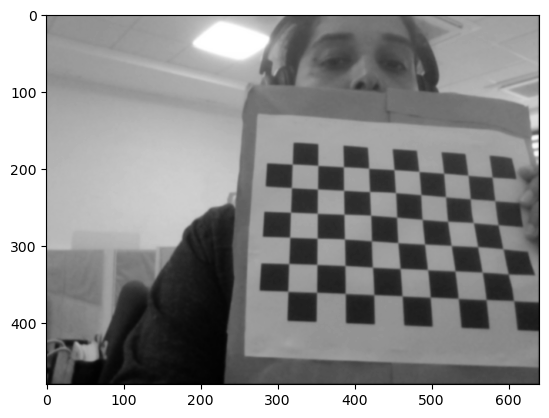

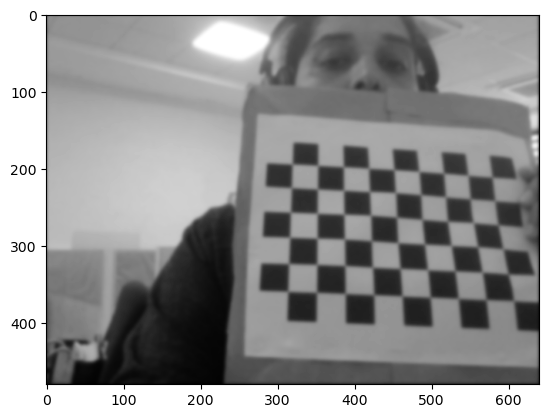

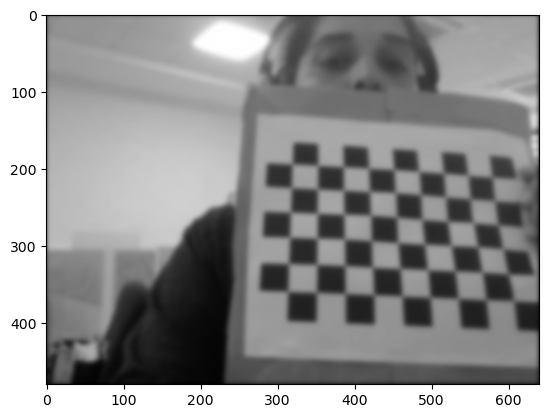

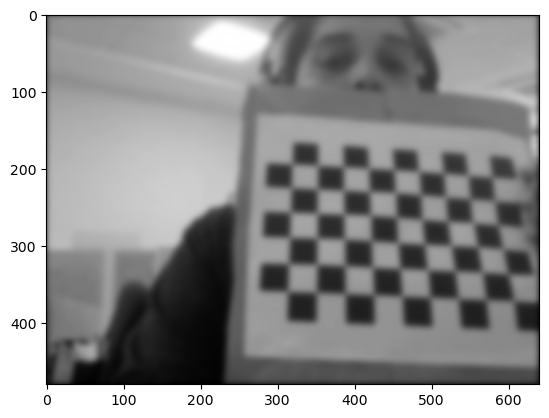

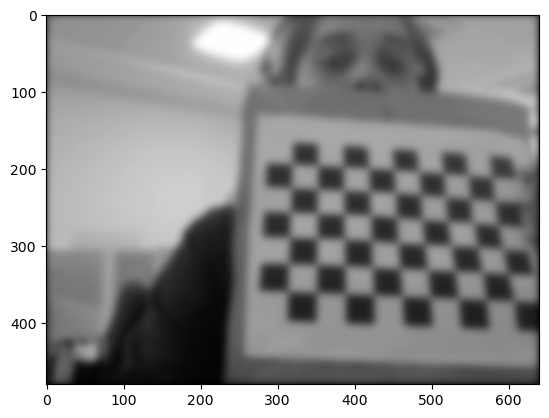

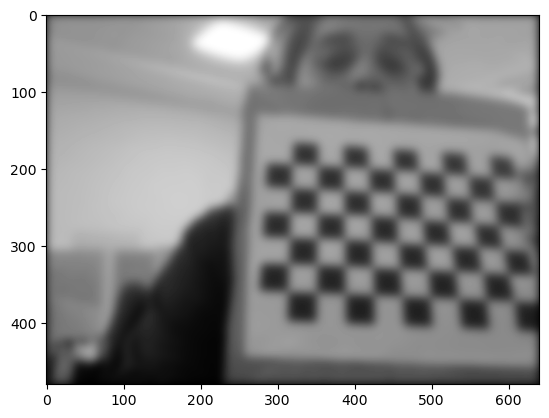

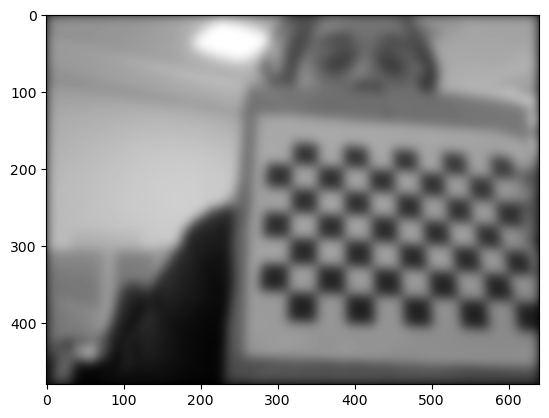

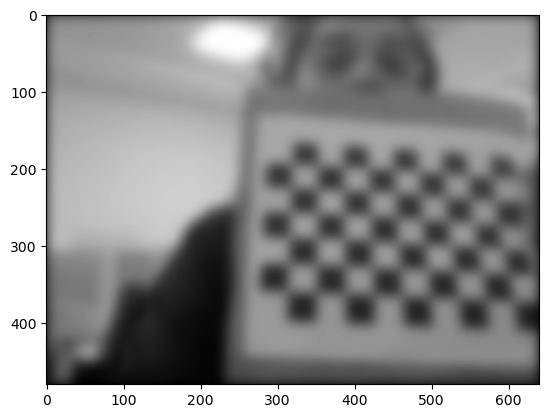

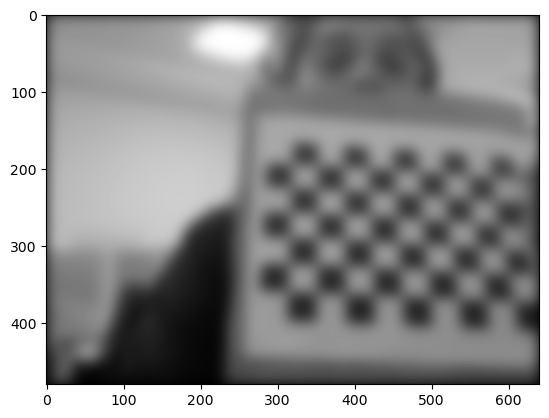

In [11]:
for i in range(len(image)):
    plt.imshow(image[i], cmap='gray')
    plt.show()